In [116]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# 21/03/2024 pipeline construction

In [101]:
data = pd.read_csv("20240319_ESS10_baseline-model_arthurcornelio88.csv")
data.shape

(37611, 12)

In [105]:
data.drop(columns='Unnamed: 0', inplace=True)

In [53]:
data.nunique()[data.nunique() == 7]

polintr     7
imsmetn     7
imdfetn     7
impcntr     7
aesfdrk     7
rshpsmk     7
marstmk     7
emplrel     7
wrkctra     7
hincfel     7
emprelp     7
emprf14     7
emprm14     7
livpnt      7
dcsfwrka    7
c19wplch    7
reshhc19    7
getavc19    7
dtype: int64

In [119]:
def num_replacer(df): #, col):
    for col in df.columns:
        df_transformed = df.copy()
        df_transformed[f'{col}_refusal'] = df_transformed[col].apply(lambda x: 1 if x == 77 else -1)
        df_transformed[f'{col}_dontknow'] = df_transformed[col].apply(lambda x: 1 if x == 88 else -1)
        df_transformed[f'{col}_noanswer'] = df_transformed[col].apply(lambda x: 1 if x == 99 else -1)
        # Replace values 77, 88, 99 with -1
        df_transformed[col] = df_transformed[col].replace([77, 88, 99], -1)
    return df_transformed

In [120]:
# Preprocessor
#num_transformer = make_pipeline(SimpleImputer(), StandardScaler())
num_replacer_transformer = FunctionTransformer(num_replacer)
cat_transformer = OneHotEncoder(handle_unknown='ignore',drop='first', sparse_output=False)

preproc = make_column_transformer(
    (num_replacer_transformer, ['sclmeet','inprdsc','health', 'rlgdgr']),
    (cat_transformer, ['cntry','ctzcntr','brncntr','gndr', 'dscrgrp']),
    remainder='passthrough'
)

X_preproc = preproc.fit_transform(data)

In [99]:
data.head()

,cntry,gndr,sclmeet,inprdsc,sclact,health,rlgdgr,dscrgrp,ctzcntr,brncntr,happy
0,BE,2,5,2,2,2,7,1,1,1,7
1,BE,2,4,4,2,2,4,2,1,2,6
2,BE,1,4,2,1,2,0,2,2,2,8
3,BE,1,5,3,2,1,5,2,2,2,10
4,BE,1,6,4,2,1,1,2,2,2,7


In [98]:
X_PRED.head()

,cntry,gndr,sclmeet,inprdsc,sclact,health,rlgdgr,dscrgrp,ctzcntr,brncntr,happy
0,FR,1,1,1,1,1,6,1,1,1,0


In [108]:
X_PRED = pd.DataFrame([np.array(["FR",1,1,1,1,1,6,1,1,1,0])], columns=['cntry', \
    'gndr', 'sclmeet', 'inprdsc', 'sclact', 'health', 'rlgdgr','dscrgrp',     \
    'ctzcntr', 'brncntr', 'happy'])

In [121]:
X_pred_preproc = preproc.transform(X_PRED)

/home/arthurcornelio/.pyenv/versions/3.10.6/envs/how-happy-in-europe/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [130]:
    X, y = X_preproc[:, :-1], X_preproc[:, -1]
    # Training the linear regression model
    model = LinearRegression()
    model = model.fit(X, y)

    y_pred = model.predict(X_pred_preproc[:, :-1])[0]

In [133]:
y_pred_constrained = np.clip(np.round(y_pred), 0, 10)
int(y_pred_constrained)

7

In [125]:

#['cntry'],'ctzcntr','brncntr','gndr', 'dscrgrp'] #categorical
#('sclmeet','inprdsc','health', 'rlgdgr') # numerical


=========

In [2]:
pwd

'/home/arthurcornelio/code/arthurcornelio88/how-happy-in-europe/arthurcornelio88-notebooks'

In [3]:
######
# website : https://ess.sikt.no/en/datafile/a93fed5b-3858-4e86-bdae-dfcf5bbc9bf9/33?tab=0

data = pd.read_csv("../data/ESS10/ESS10.csv")
data.shape

/tmp/ipykernel_409105/2932197154.py:4: DtypeWarning: Columns (166,172,174,607,608) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/ESS10/ESS10.csv")


(37611, 618)

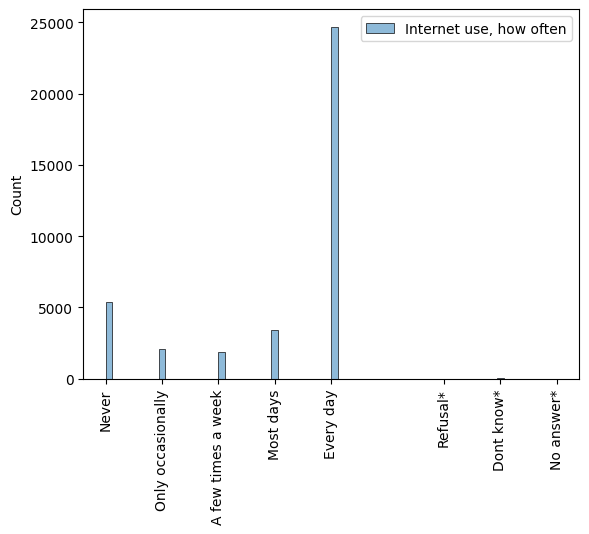

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(data[["netusoft"]])
sns.histplot(df)
plt.xticks(ticks=[1,2,3,4,5,7,8,9], rotation=90, labels=['Never','Only occasionally','A few times a week','Most days','Every day','Refusal*','Dont know*','No answer*'])
plt.legend(labels=['Internet use, how often'])

In [5]:
data.groupby('cntry').count()
#grouped by country

,name,essround,edition,proddate,idno,dweight,pspwght,pweight,anweight,nwspol,...,vinwe,inwde,jinws,jinwe,inwtm,mode,domain,prob,stratum,psu
cntry,,,,,,,,,,,,,,,,,,,,,
BE,1341,1341,1341,1341,1341,1341,1341,1341,1341,1341,...,1341,1341,1341,1341,1339,1341,1341,1341,1341,1341
BG,2718,2718,2718,2718,2718,2718,2718,2718,2718,2718,...,2426,2718,2718,2718,2687,2718,0,2718,2718,2718
CH,1523,1523,1523,1523,1523,1523,1523,1523,1523,1523,...,1523,1523,1523,1523,1486,1523,0,1523,1523,1523
CZ,2476,2476,2476,2476,2476,2476,2476,2476,2476,2476,...,2476,2476,2476,2476,2476,2476,0,2476,2476,2476
EE,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542,...,1541,1541,1542,1542,1514,1542,0,1542,1542,1542
FI,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,...,0,1576,1232,1232,1565,1577,0,1577,1577,1577
FR,1977,1977,1977,1977,1977,1977,1977,1977,1977,1977,...,1977,1977,1977,1977,1930,1977,1977,1977,1977,1977
GB,1149,1149,1149,1149,1149,1149,1149,1149,1149,1149,...,1136,1114,0,0,1114,1149,0,1149,1149,1149
GR,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,...,2765,2799,2797,2794,2791,2799,0,2799,2799,2799


In [6]:
dict_df = {
    "Human values" : 1,
    "Impact of COVID-19" : 1,
    "Test questions" : 1
}

In [7]:
df_test = data.iloc[:, 540:549]
dict_df['Test questions'] = df_test
dict_df['Test questions']

,testii1,testii2,testii3,testii4,testii5,testii6,testii7,testii8,testii9
0,6,6,6,2,2,3,66,66,66
1,6,6,6,66,66,66,4,4,4
2,6,6,6,6,5,4,66,66,66
3,6,6,6,4,4,4,66,66,66
4,6,6,6,66,66,66,8,7,6
...,...,...,...,...,...,...,...,...,...
37606,6,6,6,66,66,66,2,6,6
37607,6,6,6,66,66,66,9,3,6
37608,6,6,6,66,66,66,5,4,6
37609,6,6,6,4,5,3,66,66,66


In [8]:
df_human_values = data.iloc[:, 519:540]
dict_df['Human values'] = df_human_values
dict_df['Human values']

,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,...,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
0,4,3,1,4,2,4,4,2,3,2,...,2,2,2,5,3,2,2,3,3,2
1,2,3,2,3,2,3,3,1,5,3,...,1,2,1,3,2,2,2,2,1,2
2,2,4,1,2,3,1,3,3,3,2,...,3,3,2,3,3,3,3,3,1,3
3,2,1,2,1,1,1,1,2,2,1,...,1,1,1,7,1,1,1,1,1,1
4,3,2,2,4,3,4,2,2,3,2,...,2,4,2,5,1,3,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,3,4,2,3,3,5,3,4,4,5,...,3,4,2,6,2,2,3,2,3,3
37607,3,4,1,3,3,3,3,2,4,3,...,3,3,2,3,3,3,3,3,3,3
37608,2,2,2,3,2,3,2,2,3,2,...,2,4,2,4,3,3,4,2,2,3
37609,2,3,2,2,1,2,2,2,4,3,...,2,2,3,2,1,1,2,2,1,3


In [9]:
df_covid = data.iloc[:, 549:583]
dict_df['Impact of COVID-19'] = df_covid
dict_df['Impact of COVID-19']

,secgrdec,scidecpb,admc19,panpriph,panmonpb,govpriph,govmonpb,panfolru,panclobo,panresmo,...,hapfoc19,hapnoc19,hapnwc19,hapnpc19,haprec19,hapdkc19,hapnac19,icvacc19,getavc19,getnvc19
0,4,3,2,66,66,5,7,2,9,8,...,0,1,0,0,0,0,0,1,2,6
1,3,3,2,66,66,5,5,6,5,5,...,0,1,0,0,0,0,0,1,2,6
2,4,5,1,7,3,66,66,3,8,8,...,0,1,0,0,0,0,0,1,1,6
3,8,8,1,2,5,66,66,2,5,5,...,0,0,0,0,0,0,0,1,3,6
4,5,5,1,3,5,66,66,2,7,3,...,0,1,0,0,0,0,0,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,5,5,2,66,66,5,10,6,88,10,...,0,0,1,0,0,0,0,9,2,9
37607,4,4,1,5,9,66,66,6,5,0,...,0,1,0,0,0,0,0,9,2,9
37608,3,3,1,0,6,66,66,2,9,7,...,0,0,0,0,0,0,0,9,1,9
37609,5,5,2,66,66,3,6,4,5,5,...,0,1,0,0,0,0,0,9,2,9


In [10]:
df_dig_social_contacts = data.iloc[:, 449:519]
dict_df['Digital social contacts in works and family life'] = df_dig_social_contacts
dict_df['Digital social contacts in works and family life']

,acchome,accwrk,accmove,accoth,accnone,accref,accdk,accna,fampref,famadvs,...,wrkextra,colprop,colhlp,colspeak,colscrn,colphone,colcom,c19spwrk,c19mcwrk,mcwrkhom
0,1,0,1,1,0,0,0,0,2,4,...,66,66,6,66,66,66,66,66,66,66
1,1,0,0,1,0,0,0,0,5,5,...,66,66,6,66,66,66,66,66,66,66
2,1,0,0,1,0,0,0,0,3,3,...,66,66,6,66,66,66,66,66,66,66
3,0,1,0,0,0,0,0,0,1,1,...,8,3,2,3,7,7,1,4,3,88
4,1,1,1,1,0,0,0,0,3,3,...,10,1,2,2,7,3,4,3,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,1,0,0,0,0,0,0,0,2,2,...,66,66,6,66,66,66,66,66,66,66
37607,1,0,1,1,0,0,0,0,5,5,...,66,66,6,66,66,66,66,66,66,66
37608,1,0,0,1,0,0,0,0,4,4,...,5,4,2,5,4,3,4,3,3,6
37609,1,1,1,1,0,0,0,0,5,5,...,3,2,2,2,6,2,3,3,3,1


In [11]:
df_social_demographics = data.iloc[:, 268:449]
dict_df['Socio-demographics'] = df_social_demographics
dict_df['Socio-demographics']

,rshpsts,rshpsmk,rshpsgb,lvgptnea,dvrcdeva,marsts,marstmk,marstgb,maritalb,chldhhe,...,edumcgb1,edumbgb2,edagemgb,emprm14,occm14b,atncrse,anctry1,anctry2,regunit,region
0,66,NaN,NaN,2,2,6,NaN,NaN,6,2,...,NaN,NaN,NaN,1,5,2,444444,11020,2,BE24
1,66,NaN,NaN,2,2,6,NaN,NaN,6,2,...,NaN,NaN,NaN,2,3,1,11021,11020,2,BE24
2,1,NaN,NaN,1,2,66,NaN,NaN,1,2,...,NaN,NaN,NaN,1,3,2,11050,555555,2,BE33
3,66,NaN,NaN,2,1,4,NaN,NaN,4,1,...,NaN,NaN,NaN,3,66,2,11020,888888,2,BE21
4,66,NaN,NaN,2,2,6,NaN,NaN,6,2,...,NaN,NaN,NaN,1,3,2,11040,555555,2,BE24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,3,NaN,NaN,6,2,1,NaN,NaN,1,6,...,NaN,NaN,NaN,3,66,2,15130,888888,3,SK021
37607,66,NaN,NaN,2,1,4,NaN,NaN,4,1,...,NaN,NaN,NaN,1,9,2,15130,555555,3,SK022
37608,1,NaN,NaN,2,2,66,NaN,NaN,1,2,...,NaN,NaN,NaN,3,66,2,15130,555555,3,SK041
37609,1,NaN,NaN,2,2,66,NaN,NaN,1,1,...,NaN,NaN,NaN,1,4,1,15130,555555,3,SK021


In [12]:
df_social_exclusion = data.iloc[:,106:177]
df_social_exclusion
dict_df['Subjective well-being, social exclusion, religion, national and ethnic identity'] = df_social_exclusion
dict_df['Subjective well-being, social exclusion, religion, national and ethnic identity']

,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,...,livecnta,lnghom1,lnghom2,feethngr,facntr,fbrncntc,mocntr,mbrncntc,ccnthum,ccrdprs
0,7,5,2,2,8,2,2,3,7,6,...,6666,ENG,DUT,2,2,NG,2,NG,4,5
1,6,4,4,2,2,2,2,3,3,3,...,2013,DUT,000,1,1,6666,1,6666,3,5
2,8,4,2,1,2,1,2,1,8,9,...,2000,FRE,000,1,2,FR,2,FR,4,8
3,10,5,3,2,2,2,1,3,9,8,...,2015,ARA,DUT,1,2,IQ,2,IQ,88,88
4,7,6,4,2,2,1,1,3,9,9,...,1993,DUT,000,1,2,NL,2,NL,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,5,3,1,2,2,3,3,3,10,8,...,6666,SLO,000,1,1,6666,1,6666,2,3
37607,8,7,1,3,2,1,2,3,10,9,...,6666,SLO,000,1,1,6666,1,6666,55,66
37608,7,3,3,3,2,2,2,3,9,7,...,6666,SLO,000,2,1,6666,1,6666,3,6
37609,7,6,1,4,2,2,2,3,6,7,...,6666,SLO,000,1,1,6666,1,6666,5,9


In [13]:
# data.columns.get_loc('tmpdca')
# #dict_df.keys()

In [14]:
"Gender, Year of birth and Household grid"
"Understanding of democracy"
"Subjective well-being, social exclusion, religion, national and ethnic identity"
"Politics"
"Media and social trust"
"Identifier and weight variables"

'Identifier and weight variables'

([<matplotlib.axis.XTick at 0x7f3d0cd4e1d0>,
 [Text(0, 0, 'Extremely unhappy'), Text(10, 0, 'Extremely happy')])

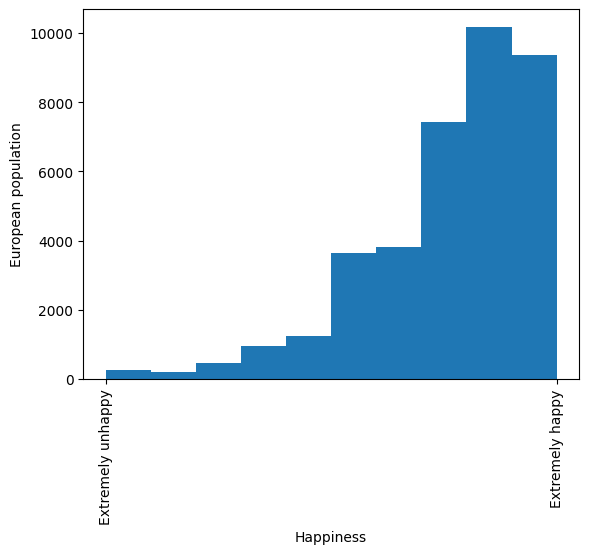

In [15]:
from matplotlib import pyplot as plt

df = dict_df['Subjective well-being, social exclusion, religion, national and ethnic identity']
df = df[['happy']][df['happy']<12]
df
plt.hist(df)
plt.xlabel('Happiness')
plt.ylabel('European population')
plt.xticks(ticks=[0,10], rotation=90, labels=['Extremely unhappy','Extremely happy'])


# Experiments on 18/03/2024

## Member of a group discriminated against in this country.

In [16]:
# yes = 1
data[data['dscrgrp']==1].shape

(2872, 618)

In [17]:
# no = 2
data[data['dscrgrp']==2].shape

(34238, 618)

In [18]:
# 7, 8, 9 = refusal, don't know, no answer
data[(data['dscrgrp']==7) | (data['dscrgrp']==8) | (data['dscrgrp']==9)].shape # or data['dscrgrp']==9 ].shape

(501, 618)

## By gender

In [19]:
# male = 1
data[data['gndr']==1].shape

(17463, 618)

In [20]:
# female = 2
data[data['gndr']==2].shape

(20148, 618)

In [21]:
# no answer = 9
data[data['gndr']==9].shape

(0, 618)

## By age (bunches of 10 years)

In [22]:
# between 15 and 20 years (minimal age = 15 years)
data[(data['agea']>=15) & (data['agea']<=20)].set_index('agea').shape

(1971, 617)

In [23]:
# between 21 and 30 years
data[(data['agea']>=21) & (data['agea']<=30)].set_index('agea').shape

(4326, 617)

In [24]:
# between 31 and 40 years
data[(data['agea']>=31) & (data['agea']<=40)].set_index('agea').shape

(5454, 617)

In [25]:
# between 41 and 50 years
data[(data['agea']>=41) & (data['agea']<=50)].set_index('agea').shape

(6228, 617)

In [26]:
# between 51 and 60 years
data[(data['agea']>=51) & (data['agea']<=60)].set_index('agea').shape

(6708, 617)

In [27]:
# between 61 and 70 years
data[(data['agea']>=61) & (data['agea']<=70)].set_index('agea').shape

(6423, 617)

In [28]:
# between 71 and 80 years
data[(data['agea']>=71) & (data['agea']<=80)].set_index('agea').shape

(4492, 617)

In [29]:
# between 81 and 90 years, it goes until 90 years
data[(data['agea']>=81) & (data['agea']<=90)].set_index('agea').shape

(1717, 617)

In [30]:
# not available = 999
data[data['agea']==999].set_index('agea').shape

(292, 617)

In [31]:
# data_fil = data[data['agea']!=999]
# x = data_fil.groupby('agea')[['agea']].count()
# xx = data[data['agea']!=999]
# #yy = np.arange(0,90,1)
# plt.hist(xx)

# 19/03

# Filtering columns

In [32]:
######
# website : https://ess.sikt.no/en/datafile/a93fed5b-3858-4e86-bdae-dfcf5bbc9bf9/33?tab=0

data = pd.read_csv("../data/ESS10/ESS10.csv")
data.shape

/tmp/ipykernel_409105/2932197154.py:4: DtypeWarning: Columns (166,172,174,607,608) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/ESS10/ESS10.csv")


(37611, 618)

In [33]:
data.columns

Index(['name', 'essround', 'edition', 'proddate', 'idno', 'cntry', 'dweight',
       'pspwght', 'pweight', 'anweight',
       ...
       'vinwe', 'inwde', 'jinws', 'jinwe', 'inwtm', 'mode', 'domain', 'prob',
       'stratum', 'psu'],
      dtype='object', length=618)

In [34]:
identification = ['idno', 'cntry']


In [35]:
data.drop(columns=['name'], inplace=True)


In [36]:
data


,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,nwspol,...,vinwe,inwde,jinws,jinwe,inwtm,mode,domain,prob,stratum,psu
0,10,3.2,02.11.2023,10038,BE,0.882220,0.972276,0.718075,0.698167,30,...,2022-09-01 17:47:00,2022-09-01 17:47:00,2022-09-01 17:47:00,2022-09-01 17:47:00,36.0,1,1.0,0.000397,188,2596
1,10,3.2,02.11.2023,10053,BE,1.047643,0.888635,0.718075,0.638107,10,...,2022-04-08 11:07:00,2022-04-08 11:10:00,2022-04-08 11:07:00,2022-04-08 11:10:00,54.0,2,2.0,0.000334,194,2206
2,10,3.2,02.11.2023,10055,BE,1.087741,0.722811,0.718075,0.519033,150,...,2022-05-20 11:08:00,2022-05-20 11:10:00,2022-05-20 11:08:00,2022-05-20 11:10:00,77.0,1,2.0,0.000322,198,2114
3,10,3.2,02.11.2023,10062,BE,0.909910,1.005565,0.718075,0.722072,15,...,2022-05-22 13:58:00,2022-05-22 13:59:00,2022-05-22 13:58:00,2022-05-22 13:59:00,55.0,1,1.0,0.000385,150,2645
4,10,3.2,02.11.2023,10064,BE,0.918949,0.638705,0.718075,0.458639,60,...,2022-05-18 11:44:00,2022-05-18 11:45:00,2022-05-18 11:44:00,2022-05-18 11:45:00,55.0,1,1.0,0.000381,149,2313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,10,3.2,02.11.2023,27808,SK,0.515714,0.339385,0.323800,0.109893,120,...,2021-06-08 14:28:34,2021-06-08 14:30:41,2021-06-08 14:29:01,2021-06-08 14:31:44,70.0,1,1.0,0.001522,2610,27206
37607,10,3.2,02.11.2023,27826,SK,0.297974,0.196093,0.323800,0.063495,90,...,2021-08-02 10:33:27,2021-08-02 10:36:27,2021-08-02 10:35:22,2021-08-02 10:37:34,45.0,1,2.0,0.002635,2610,27217
37608,10,3.2,02.11.2023,27834,SK,0.965931,0.857000,0.323800,0.277497,30,...,2021-06-26 20:52:15,2021-06-26 20:53:05,2021-06-26 20:52:27,2021-06-26 20:54:32,33.0,1,1.0,0.000813,2631,27134
37609,10,3.2,02.11.2023,27846,SK,0.854279,0.624287,0.323800,0.202144,30,...,2021-07-21 14:14:41,2021-07-21 14:17:31,2021-07-21 14:16:38,2021-07-21 14:18:38,43.0,1,1.0,0.000919,2638,27183


In [37]:
data[['cntry', 'gndr','sclmeet','inprdsc','sclact','health','rlgdgr','dscrgrp','ctzcntr', 'brncntr', 'happy']].to_csv("20240319_ESS10_baseline-model_arthurcornelio88.csv")

In [38]:
datatest = pd.read_csv("20240319_ESS10_baseline-model_arthurcornelio88.csv")

In [39]:
proportion = datatest['sclmeet'][datatest['sclmeet']>=8].shape[0] / datatest['sclmeet'].shape[0]
proportion


0.003802079178963601

In [40]:
datatest['gndr'][datatest['gndr']>=3].shape[0]

0

In [41]:
datatest

,Unnamed: 0,cntry,gndr,sclmeet,inprdsc,sclact,health,rlgdgr,dscrgrp,ctzcntr,brncntr,happy
0,0,BE,2,5,2,2,2,7,1,1,1,7
1,1,BE,2,4,4,2,2,4,2,1,2,6
2,2,BE,1,4,2,1,2,0,2,2,2,8
3,3,BE,1,5,3,2,1,5,2,2,2,10
4,4,BE,1,6,4,2,1,1,2,2,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
37606,37606,SK,1,3,1,2,3,8,2,1,1,5
37607,37607,SK,1,7,1,3,2,1,2,1,1,8
37608,37608,SK,1,3,3,3,2,8,2,1,1,7
37609,37609,SK,2,6,1,4,2,3,9,2,1,7


In [42]:
######
# website : https://ess.sikt.no/en/datafile/a93fed5b-3858-4e86-bdae-dfcf5bbc9bf9/33?tab=0

data = pd.read_csv("20240319_ESS10_manually-filtered_arthurcornelio88.csv")
data.columns


/tmp/ipykernel_409105/264896957.py:4: DtypeWarning: Columns (82,88,90) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("20240319_ESS10_manually-filtered_arthurcornelio88.csv")


Index(['Unnamed: 0', 'idno', 'cntry', 'netusoft', 'ppltrst', 'pplfair',
       'pplhlp', 'polintr', 'psppsgva', 'actrolga',
       ...
       'vdtpitre', 'vdtpscre', 'vdtpaure', 'vdtpvire', 'vdtpoire', 'vdtpntre',
       'vdtpapre', 'vdtprere', 'vdtpdkre', 'vdtpnare'],
      dtype='object', length=413)